# Wind Turbine Design Exploration
## by Celine Broomhead

## Preliminary Wrangling

> I chose the wind turbine dataset provided by the US Geological Services website. This dataset compiles data from all wind farm project in the United Stated begining in the 1970 to 2019. The data was provided in an .CSV file which I downloaded an imported into this notebook. The dataset can be found here: https://eerscmap.usgs.gov/uswtdb/data/

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df_raw = pd.read_csv('uswtdb_v3_1_20200717.csv')

/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(df_raw.shape)
print(df_raw.dtypes)
print(df_raw.head(10))

(64553, 25)
turbine_id          int64
faa_ors            object
faa_asn            object
usgs_pr_id        float64
eia_id            float64
t_state            object
t_county           object
t_fips              int64
project_name       object
year_online       float64
p_tnum              int64
p_cap              object
t_manufacturer     object
t_model            object
t_cap             float64
t_hub_height      float64
t_rotor_d         float64
t_rsa             float64
t_total_height    float64
t_conf_atr          int64
t_conf_loc          int64
t_img_date         object
t_img_srce         object
xlong             float64
ylat              float64
dtype: object
   turbine_id faa_ors faa_asn  usgs_pr_id   eia_id t_state     t_county  \
0     3072677     NaN     NaN      5042.0  52161.0      CA  Kern County   
1     3073412     NaN     NaN      5756.0  52161.0      CA  Kern County   
2     3073335     NaN     NaN      4946.0  52161.0      CA  Kern County   
3     3072695     NaN   

## Data Cleaning

In [5]:
df_new = df_raw.filter(['t_manufacturer', 't_model', 't_cap', 'year_online', 't_hub_height', 't_rotor_d', 't_rsa', 't_total_height', 't_state', 't_conf_atr', 't_conf_loc'], axis=1)

In [6]:
# create dataframe for turbines located in CA only to only work on a sample of the data. 
# there is a lot of variation in the data for all of these values, so using a smaller subset 
# of the population will simplify the analysis
df_new['CA'] = np.where(df_new['t_state']== 'CA', True, False)
df = df_new.loc[df_new['CA'] == True]

In [7]:
df.dtypes

t_manufacturer     object
t_model            object
t_cap             float64
year_online       float64
t_hub_height      float64
t_rotor_d         float64
t_rsa             float64
t_total_height    float64
t_state            object
t_conf_atr          int64
t_conf_loc          int64
CA                   bool
dtype: object

In [8]:
df.t_manufacturer.unique()
# Here we see that there might be a data discrepency between 'Vestas' and 'Vestas North America'. It's most likely that this is the same manufacuter under two different names, 
# so we should clean up the names to all be 'Vestas'

array(['Vestas North America', 'Vestas - American Wind Technology Inc.',
       'Vestas', 'GE Wind', 'Danwin', nan, 'Micon', 'AAER', 'Mitsubishi',
       'Zond', 'NEG Micon', 'Wincon', 'Siemens Gamesa Renewable Energy',
       'Nordtank', 'Clipper', 'NedWind', 'Siemens', 'Gamesa', 'Norwin',
       'Nordex', 'Lolland', 'REpower', 'Bonus', 'DWT', 'Windmatic',
       'Vanguard'], dtype=object)

In [9]:
df['t_manufacturer'] = df['t_manufacturer'].replace(['Vestas North America','Vestas - American Wind Technology Inc.'],'Vestas')

<ipython-input-9-66890763bf2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_manufacturer'] = df['t_manufacturer'].replace(['Vestas North America','Vestas - American Wind Technology Inc.'],'Vestas')


In [10]:
# check work above
df.t_manufacturer.unique()

array(['Vestas', 'GE Wind', 'Danwin', nan, 'Micon', 'AAER', 'Mitsubishi',
       'Zond', 'NEG Micon', 'Wincon', 'Siemens Gamesa Renewable Energy',
       'Nordtank', 'Clipper', 'NedWind', 'Siemens', 'Gamesa', 'Norwin',
       'Nordex', 'Lolland', 'REpower', 'Bonus', 'DWT', 'Windmatic',
       'Vanguard'], dtype=object)

In [11]:
# I want to find the top 5 manufacturers in the state of CA
top_manufacturers = df.groupby([ 't_manufacturer']).size().sort_values(ascending= False).reset_index().head()
top_manufacturers.drop(axis=1, columns=[0], inplace= True)

In [12]:
# check work above
top_manufacturers

,t_manufacturer
0,Vestas
1,GE Wind
2,Micon
3,Mitsubishi
4,REpower


In [13]:
# only keep the entry in the main datafram that have one of our top 5 manufactrurers. 
df = pd.merge(df, top_manufacturers, on=['t_manufacturer'], how='right')

In [14]:
df.head()

,t_manufacturer,t_model,t_cap,year_online,t_hub_height,t_rotor_d,t_rsa,t_total_height,t_state,t_conf_atr,t_conf_loc,CA
0,Vestas,NaN,95.0,1987.0,NaN,NaN,NaN,NaN,CA,2,3,True
1,Vestas,NaN,95.0,1987.0,NaN,NaN,NaN,NaN,CA,2,3,True
2,Vestas,NaN,95.0,1987.0,NaN,NaN,NaN,NaN,CA,2,3,True
3,Vestas,NaN,95.0,1987.0,NaN,NaN,NaN,NaN,CA,2,3,True
4,Vestas,NaN,95.0,1987.0,NaN,NaN,NaN,NaN,CA,2,3,True


In [15]:
df.dropna(inplace=True)

In [16]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(3168, 12)
t_manufacturer     object
t_model            object
t_cap             float64
year_online       float64
t_hub_height      float64
t_rotor_d         float64
t_rsa             float64
t_total_height    float64
t_state            object
t_conf_atr          int64
t_conf_loc          int64
CA                   bool
dtype: object
    t_manufacturer  t_model   t_cap  year_online  t_hub_height  t_rotor_d  \
160         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
161         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
162         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
163         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
164         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
165         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
166         Vestas  V90-3.0  3000.0       2008.0          80.0       90.0   
167         Vestas  V90-3.0  3000.0       2008.

In [17]:
print(df.describe())

             t_cap  year_online  t_hub_height    t_rotor_d         t_rsa  \
count  3168.000000  3168.000000   3168.000000  3168.000000   3168.000000   
mean   1470.088384  2003.775884     61.190688    66.389899   4240.377525   
std    1079.103315    11.031557     22.364278    31.511926   3045.171737   
min      65.000000  1983.000000     22.800000    15.300000    183.850000   
25%     225.000000  1995.000000     40.000000    27.000000    572.560000   
50%    1500.000000  2009.000000     65.000000    77.000000   4656.630000   
75%    2050.000000  2012.000000     80.000000    90.000000   6361.730000   
max    3600.000000  2019.000000     94.000000   117.000000  10751.320000   

       t_total_height   t_conf_atr  t_conf_loc  
count     3168.000000  3168.000000      3168.0  
mean        94.394823     2.825758         3.0  
std         37.758558     0.381039         0.0  
min         30.400000     1.000000         3.0  
25%         53.500000     3.000000         3.0  
50%        103.600000

### What is the structure of your dataset?

> The dataset (df) that I will be working with is a subset of the larger dataset (df_raw). The sub-dataset contains 2923 row and 11 variables and 1 engineered feature. Each of the variables are named and described in the key below. 

> Key
- t_manufacturer: turbine manufacturer - name of the original equipment manufacturer of the turbine
- t_model: turbine model - manufacturer's model name of each turbine
- t_cap: Turbine rated capacity in kilowatt (kW). The manufacturer's stated output power at rated wind speed.
- t_hub_height: turbine hub height in meters (m)
- t_rotor_d: turbine rotor diameter in meters (m)
- t_rsa: turbine rotor swept area square meters (m^2); calculated as 3.14159 (([rotor_dia] /2)*([rotor_dia] /2)
- t_total_height: turbine total height - height of entire wind turbine from ground to tip of a vertically extended blade above the tower. Computed as the hub height plus half of the rotor diameter, in meters, when t_hh and t_rd are non-missing. Otherwise, the total height as provided by the FAA DOF or FAA OE/AAA is used, which can be considered a maximum height
- t_state: state where turbine is located
- t_conf_atr: level of confidence in the turbine's attributes, from low to high
- t_conf_loc: Level of confidence in turbine location, from low to high

### What is/are the main feature(s) of interest in your dataset?

> A turbine after all is meant to generate power, so the most interesting variable is going to the rated capacity of a turbine. This seems like the most interesting dependent variable, and relationship to the other variables can be explored further to understand how they influence the total output power of a turbine. The main question I seek to answer is wehther turbine size and size of it's sub-component directly influence the rated capacity. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will be looking at all the variables, but some of the most interesting ones could be rotor size, rotor swept area, hub height, and total height. But some of the other variables i'm also interested are manufacturer and model, as well as the number of years online. 

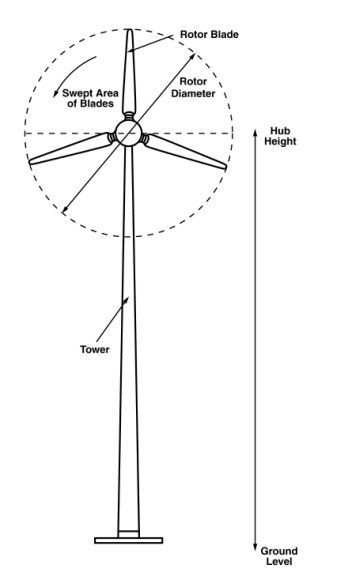

In [18]:
from IPython.display import Image
Image(filename='1_v-gKXSlULMzxsnysztzM7w.jpg')

## Univariate Analysis 

In [19]:
#set the base color for the charts
green = sb.color_palette("hls", 8)[2]
blue = sb.color_palette("hls", 8)[5]

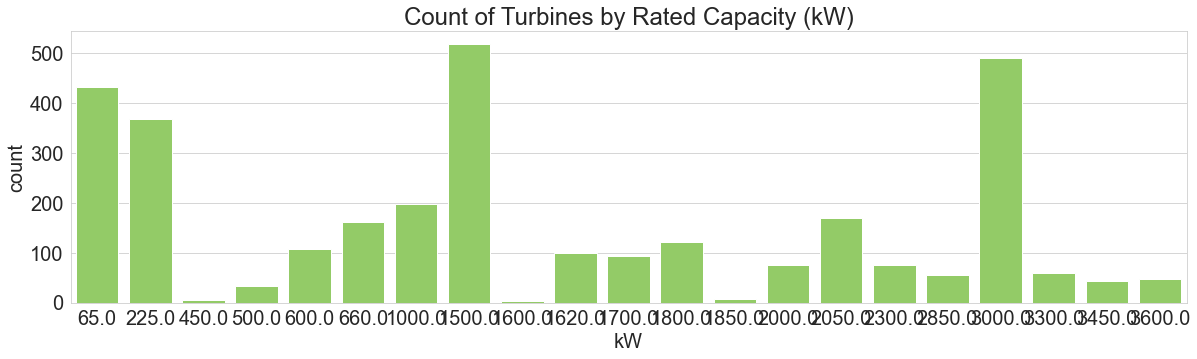

In [112]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Count of Turbines by Rated Capacity (kW)")
sb.countplot(data= df, x='t_cap', color=green, edgecolor='white').set( xlabel = "kW");

> This histogram is just to understand the rated capacity a bit better. I wanted to quickly see the distribution of the capacity accross all turbines in CA. The histogram doesn't particularly reveal a normal or bimodal distribution. Maybe a trimodal distribution slightly skewed to the right? (if there is such a thing). I'm not sure there is much to be gleaned from this chart so let's keep going. 

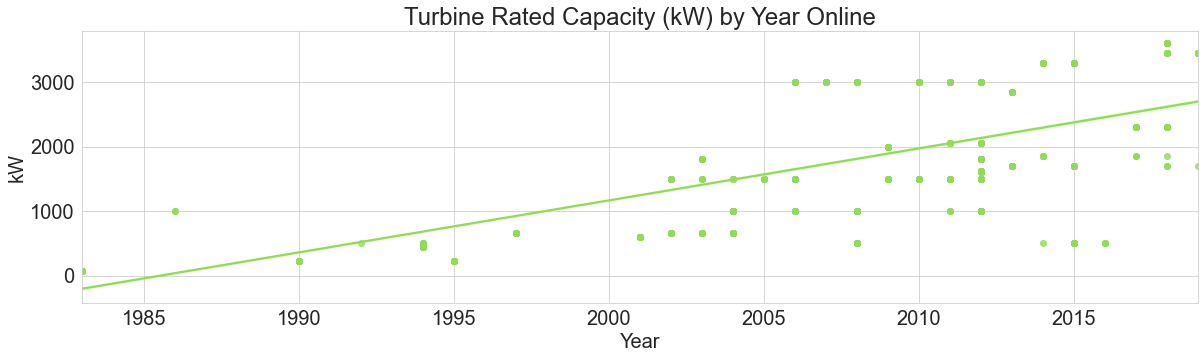

In [113]:
# standard-scaled plot of rated capacity
plt.figure(figsize = [20, 5])
plt.title('Turbine Rated Capacity (kW) by Year Online')
sb.regplot(data = df, y ='t_cap', x ='year_online', color=green).set(xlabel="Year", ylabel = "kW");

> I chose to then plot the rated capacity of all turbines over time to see how capacity changed over time. As expected, we can see the linearity of the regression line, which shows capacity increases as the years go by. But I wanted to see how quickly rated capacity increased over time, so I plotted the log scale of the same data below. 

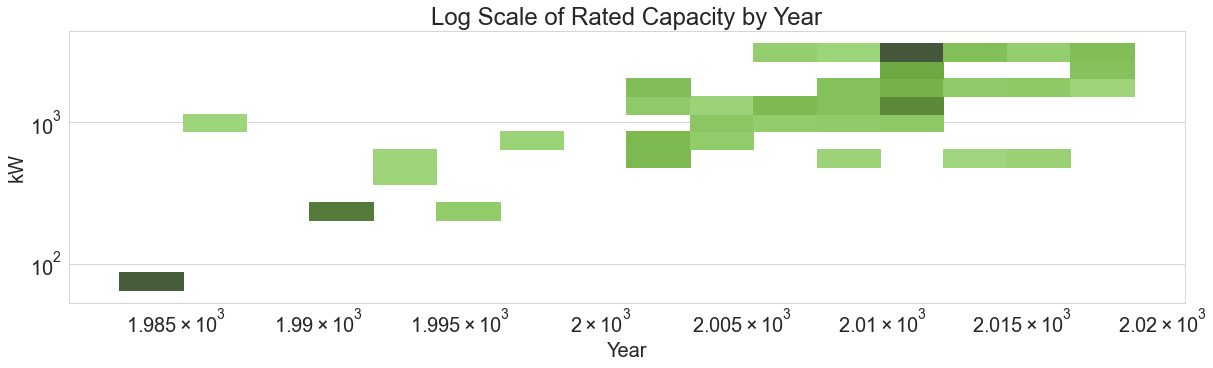

In [114]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title('Log Scale of Rated Capacity by Year')
sb.histplot(data = df, y ='t_cap', x ='year_online', color=green, log_scale=True).set(xlabel="Year", ylabel = "kW");

> Even though the count plot of total capacity didnt reveal a particularly defined ditribution, I plotted the log scale of the same data to see what it looked like. I discovered that turbine rated capacity defnitely increased rapidly starting in 2000, and showing numerous new turbine deployments starting in 2010. This suggest that rated capacity increases over time. Now let's look at other variables that could explain this increase. 

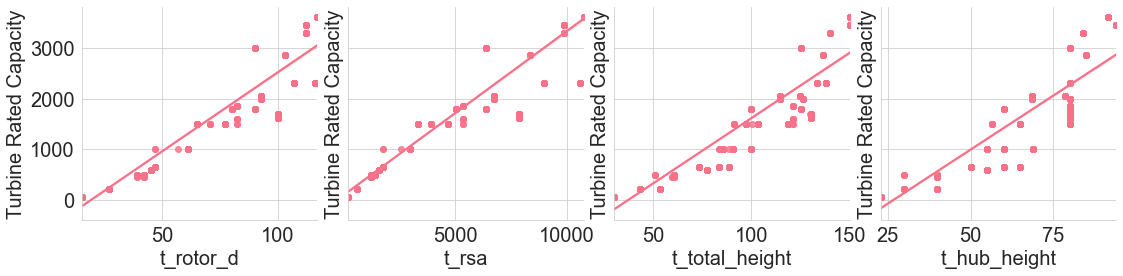

In [124]:
# explore other variables through pairplot 1
sb.pairplot(df, y_vars=['t_cap'], 
            x_vars=['t_rotor_d','t_rsa', 't_total_height', 't_hub_height'], 
            kind='reg', 
            diag_kind=None, 
            height=4).set( ylabel = "Turbine Rated Capacity");

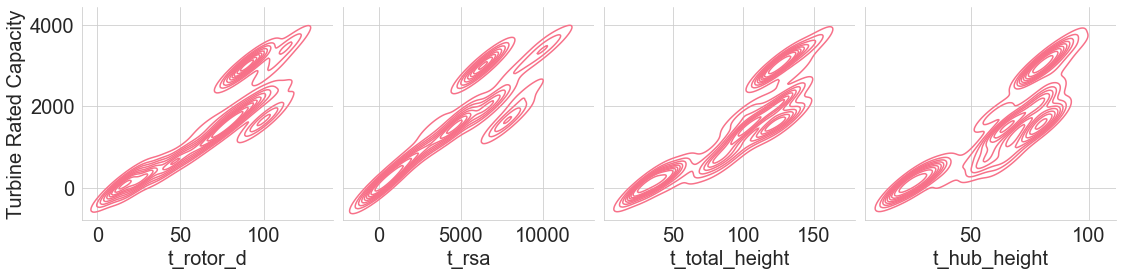

In [126]:
#explore other variables through pairplot 2
sb.pairplot(df, y_vars=['t_cap'], 
            x_vars=['t_rotor_d','t_rsa', 't_total_height', 't_hub_height'], 
            kind='kde', 
            diag_kind=None, 
            height=4).set( ylabel = "Turbine Rated Capacity");

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I expect there to be a relationship between the variables that represent components of a turbine to it's rated capacity. The above pariplots show components rotor diameter, rotor swept area, total height, and hub height all have positive relationships with the rated capacity. I chose the KDE plot type because it shows nicely the different grouping of the points. Rotor swept area in particular was intesting because there is a clear middle grouping along the best fit line, and two other grouping above and below the line. It would be interesting to investigate the influencing factors being such grouping. 

For example:
- 1) if we plotted with years, could we see the the grouping of turbines in the 3000 kW and 6000 RSA area belong to newer turbines, indicating an new design or cnew technology?
- 2)  are the turbine in the 2000 kW and 8000 RSA older turbines that aren't being built anymore?
- 3) is there a variation between the different manufacturers?

All of this will be explored in the next section. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes 1) I reduced the sample size to only analyze turbines in CA. The reasoning behind this was to make development faster, and I also have a personal interest in CA. 2) There were also some values that were NaNs, so I dropped those. I didn't really see any obvious outliers that could of skewed the data. 3) I also noticed that there were two manufacturers of the same name: 'Vestas' and 'Vestas North America'. I changed the names to all be 'Vestas'. 

## Bivariate Exploration

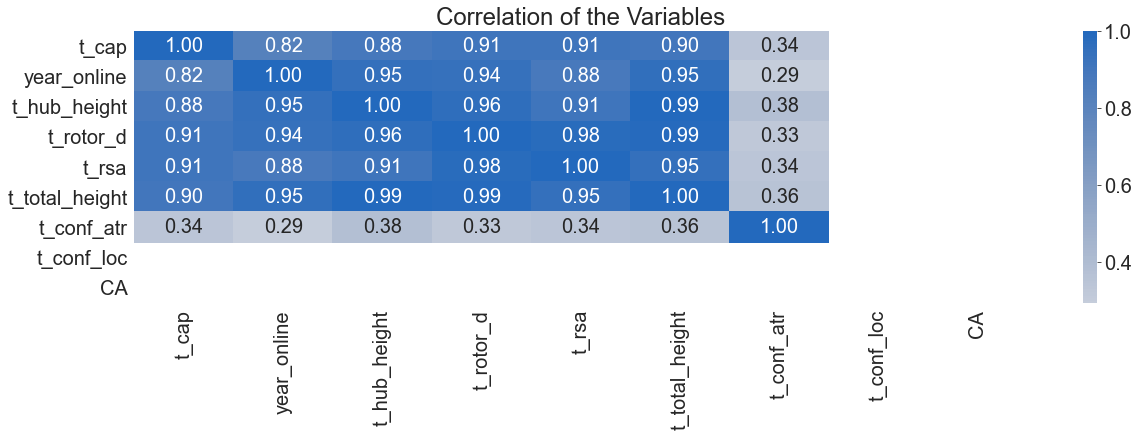

In [129]:
plt.figure(figsize = [20, 5])
plt.title('Correlation of the Variables')
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> The heatmap plot shows the correlation values between all the variables. The two variables with the highest corrolations are rotor diameter and swept area, suggesting that these two variable might be corrolated. Perhaps swept area is dependent on the rotor diameter. Another pair of variables that are highly correlated is between main variable of interest rated capacity and rotor swept area.

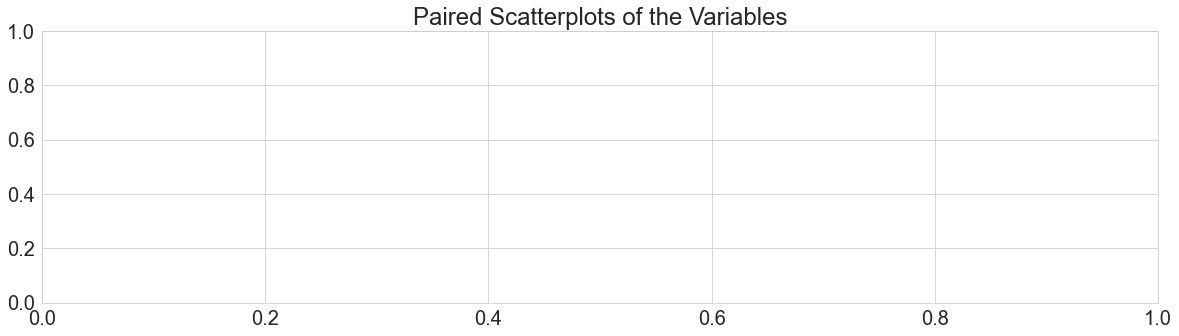

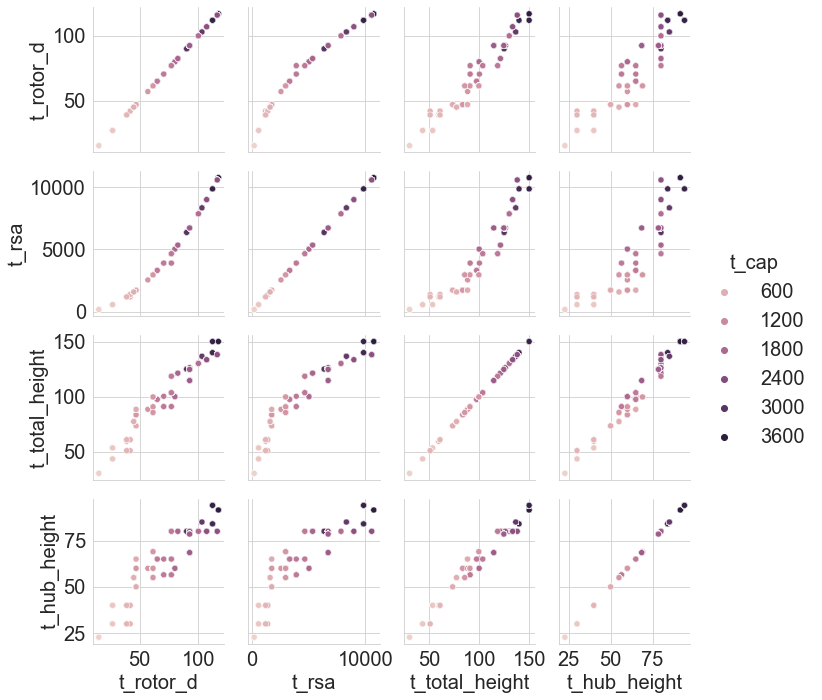

In [131]:
plt.figure(figsize = [20, 5])
plt.title('Paired Scatterplots of the Variables');
sb.pairplot(df[['t_cap','t_rotor_d','t_rsa', 't_total_height', 't_hub_height']], diag_kind=None, hue= 't_cap');

> In the pariplots above, I quickly plot all the variables of interest against eaach othter to see if something jumps out at me. My initial observation is the relationship between rotor diameter and rotor swept area. Although the relationship is definitely positive, as rotor diameter increase, the rotor swept area increases but with a slight deceleration. 

> Since the pairplots above don't reveal anything riveting, I'd like to explore a few other variables that are also part of this dataset. Those are the manufacturer, model, year online, and confidence level of the attributes. 

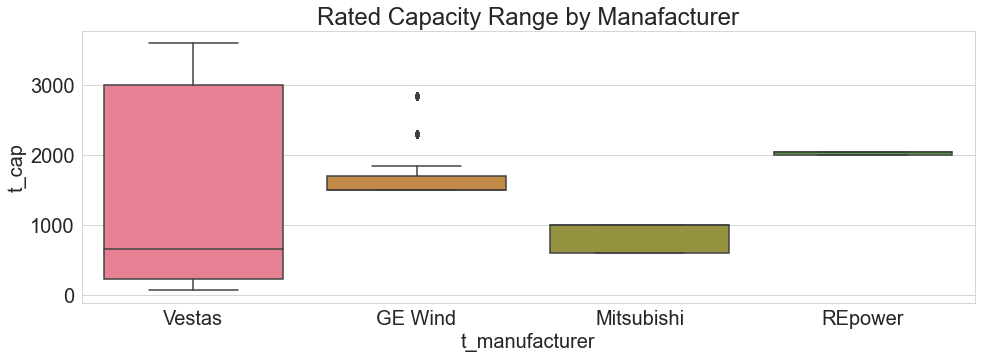

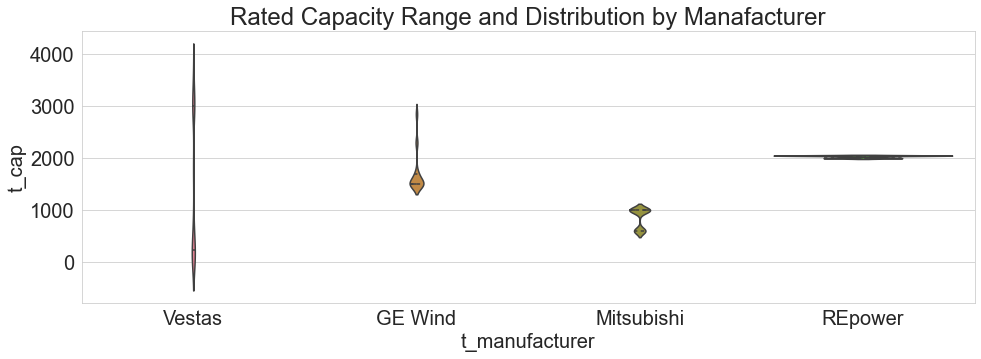

In [133]:
# Box Plot
plt.figure(figsize = [16, 5])
plt.title('Rated Capacity Range by Manafacturer');
sb.set_palette('husl', 9)
sb.boxplot(data=df, x='t_manufacturer', y='t_cap') 

# Violin Plot
plt.figure(figsize = [16, 5])
plt.title('Rated Capacity Range and Distribution by Manafacturer');
sb.set_palette('husl', 9)
sb.violinplot(data=df, x='t_manufacturer', y='t_cap', inner = 'quartile');

> The two plots above show the same data in two different types of plots. The box plots show nicely the quartile ranges of the rated capacity by manufacturer. I wanted see if some manufacturer cornered the CA market in some way. What is interesting to see if that Vestas has the largest range in capacity which spans the other two manufacturers illustrated. While GE Wind and Mistubishi only have range in two seperate distinct area. Based on the discovery above that rated capacity increases over time, a possible explanation for this would be that Mistubishi and GE Wind only produce turbine during a certain time frame, while Vesta produced turbines for the longest. 

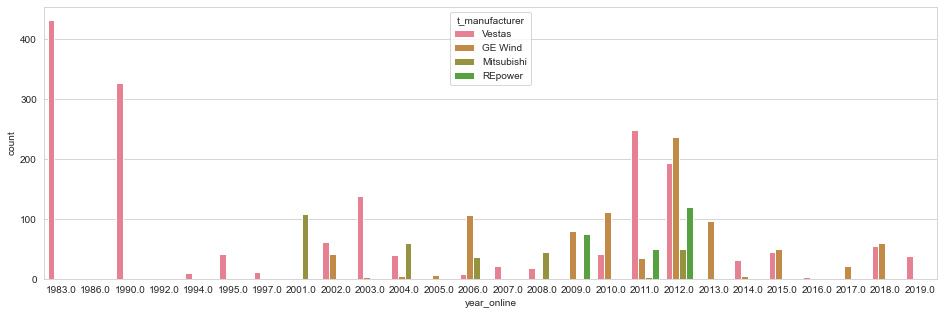

In [72]:
# clustered bar charts: try to plot the most common turbine in CA 
# and show the count for each manufacturer
plt.figure(figsize = [16, 5])
plt.title('Number of Turbine Online by Manufactuer over Time');
sb.set_palette('husl', 9)
sb.countplot(data=df, x='year_online', hue='t_manufacturer');

> To support this theory about the years_line, I graphed the count of turbine by manufacturer over time and indeed saw that Vestas turbine were deployed between the year 1983 and 2019, while GE Wind depoyed in between 2002 and 2018, and Mistubishi between 2001 and 2012. 

> Now let's explore another variable t_model in the same manner as above. 

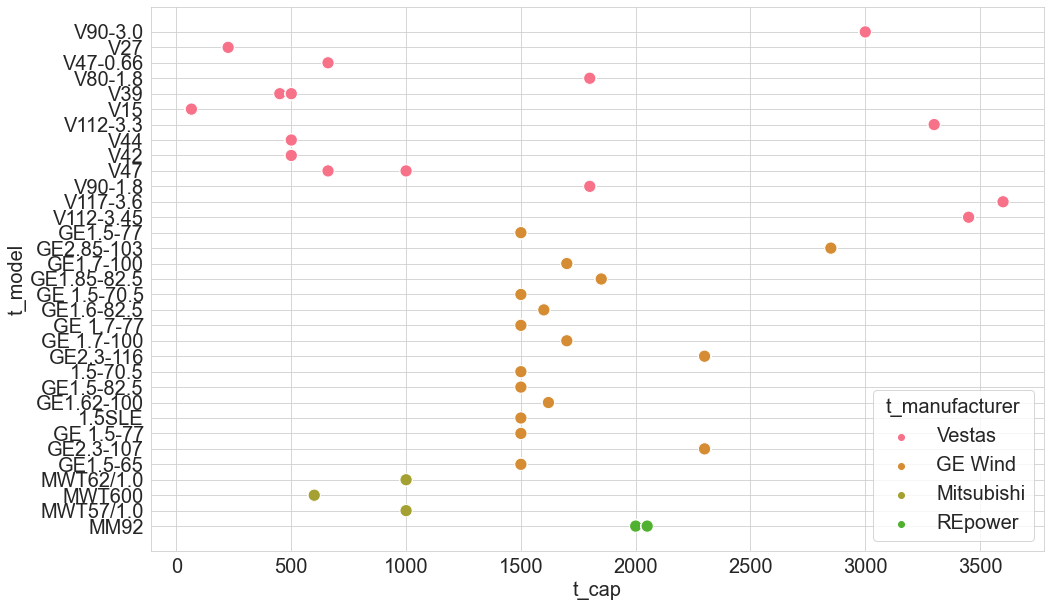

In [135]:
# I want to see how all the models in the dataset fair on the rated capacity scale, and see if manufacturer focus on different areas
plt.figure(figsize = [16, 10])
plt.title('Turbine Manufacturer and Model by Rated Capacity');
sb.set_style('whitegrid')
sb.set_palette('husl', 9)
sb.scatterplot(data=df, x='t_cap', y='t_model', hue= 't_manufacturer', s=150);

> This scatterplot is useful in seeing where the different model fall on the rated capacity scale. Each dot is also color coded to show the manufacturers, so we can clearly see that GE Wind has a concentration in the 1500 kW area, while Vestas has a much wider range. Possibly due to the fact that Vestas has deployed turbines the longest in CA. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A little more research could be done to see if there are different model lines for each of the manufacturers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did not expore this in the bivariate analysis. 

## Multivariate Exploration

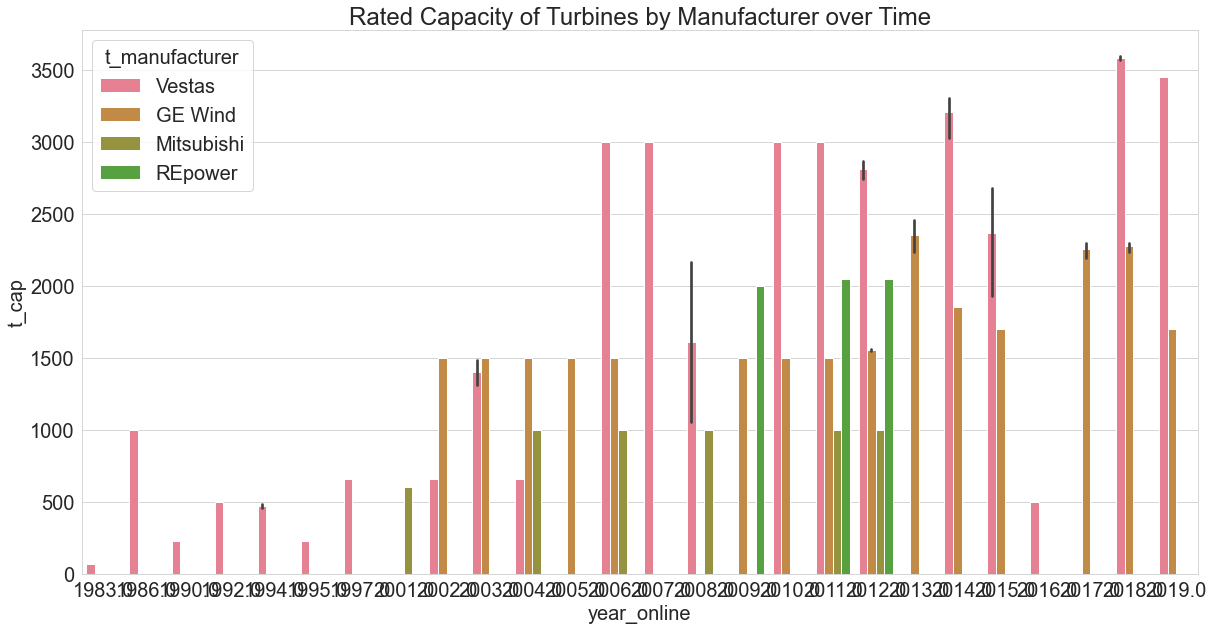

In [138]:
# Did some manaufacturers outperform others in rated capacity compared to size?
plt.figure(figsize = [20, 10])
plt.title('Rated Capacity of Turbines by Manufacturer over Time');
sb.set_palette('husl', 9)
sb.barplot(x="year_online", y="t_cap", hue="t_manufacturer", data=df);

> Not only has Vestas turbine been deployed in CA the longest, it has also deployed the most powerful turbines of all the manufacturers present in CA. GE Wind is the second in line, but it look like they entered the CA market a bit later than Vestas, and trends in rated capacity show that it's bene playing catch-up to Vestas. 

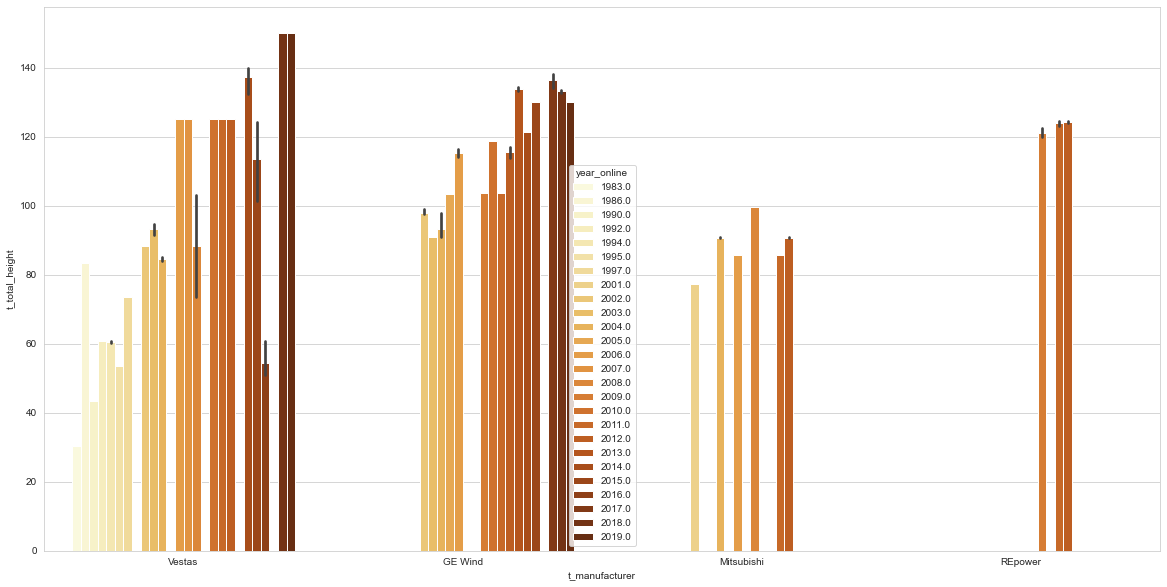

In [84]:
# Did manafacturers who deployed bigger turbines first outperform others?
plt.figure(figsize = [20, 10])
plt.title('Total Height of Turbine by Manufacturer over Time');
sb.barplot(x="t_manufacturer", y="t_total_height", hue="year_online", data=df, edgecolor='white', palette="YlOrBr");

> Above I wanted to see the total height of the turbines deployed by manufacturer and year. I thought it would should me if one manufacturer in particular outperformed competitors in terms of size of turbines. Also pervious analysis shows GE Wind as selling few turbines and less rated capacity, it appears that the turbine sizes are only slightly smaller that the Vestas. This is interesting because it could possibly idicator that the total height of the turbine does not corrolate directly with the rated capacity. 

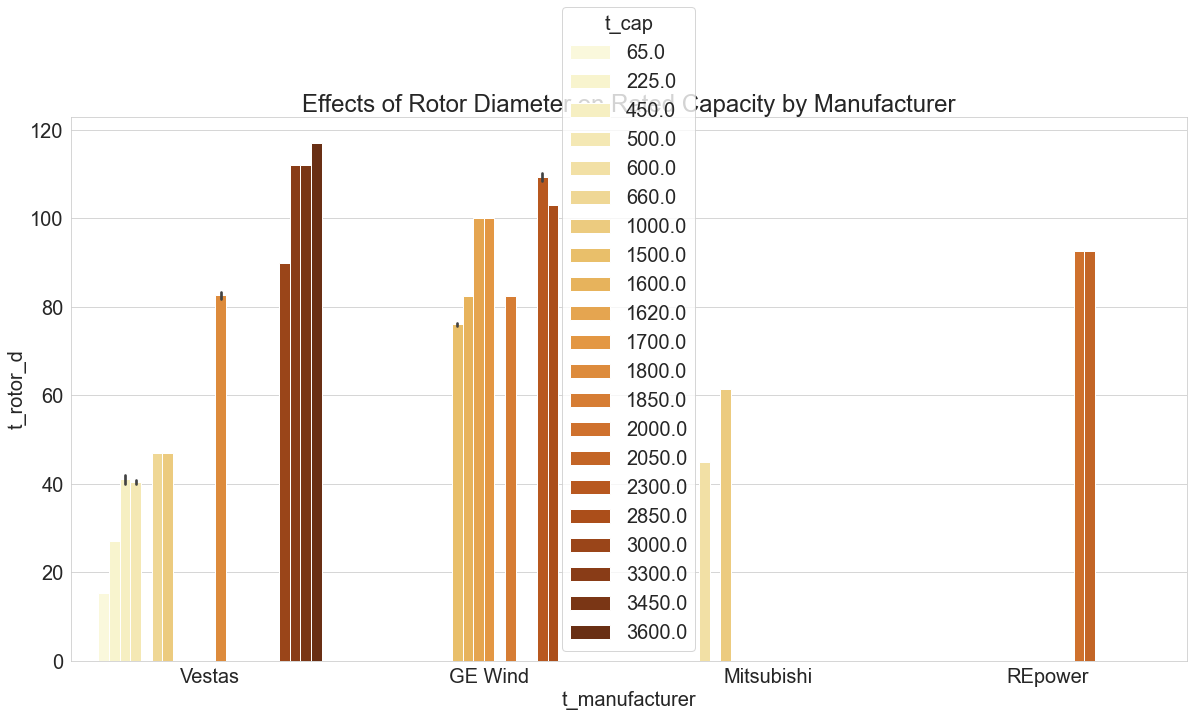

In [139]:
# Did manafacturers who deployed larger rotor diameter outperform others?
plt.figure(figsize = [20, 10])
plt.title('Effects of Rotor Diameter on Rated Capacity by Manufacturer');
sb.barplot(x="t_manufacturer", y="t_rotor_d", hue="t_cap", data=df, edgecolor='white', palette="YlOrBr");

> A similar analysis to the total height, I looked at rotor diameter. Similar conclusions could be made. 

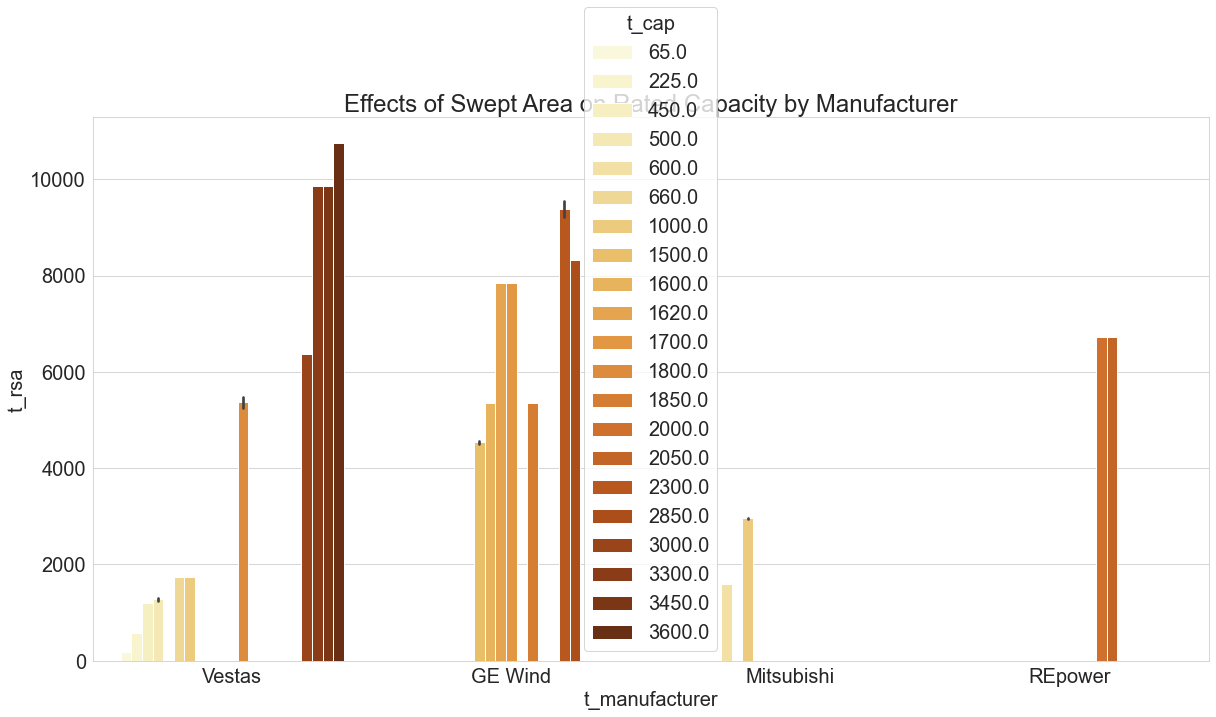

In [140]:
# Did manafacturers who deployed larger rotor diameter outperform others?
plt.figure(figsize = [20, 10])
plt.title('Effects of Swept Area on Rated Capacity by Manufacturer');
sb.barplot(x="t_manufacturer", y="t_rsa", hue="t_cap", data=df, edgecolor='white', palette="YlOrBr");

> And again with swept area, similar conclusions could be made.

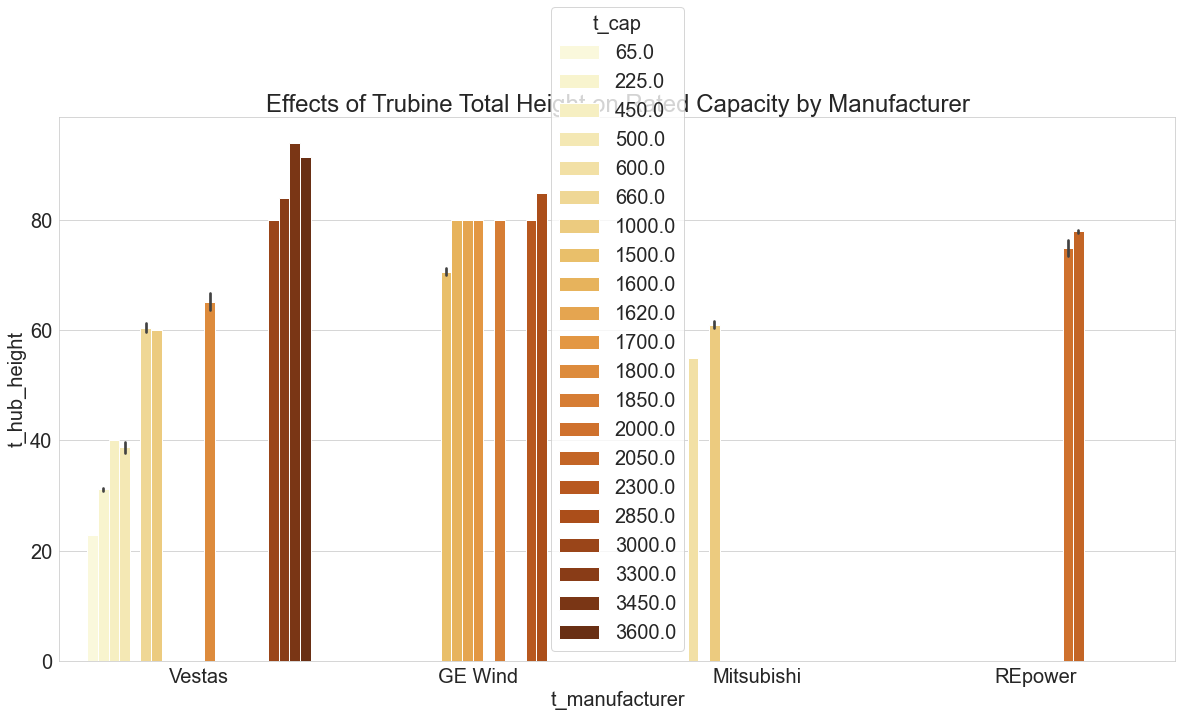

In [141]:
# Did manafacturers who deployed larger rotor diameter outperform others?
plt.figure(figsize = [20, 10])
plt.title('Effects of Trubine Total Height on Rated Capacity by Manufacturer');
sb.barplot(x="t_manufacturer", y="t_hub_height", hue="t_cap", data=df, edgecolor='white', palette="YlOrBr");

> And lastly with hub heigth, more similar conclusions could be made.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The main goal of the charts above was to look at the same data from different perspectives. I was particularly interested in uncovering trends between the different manufacturers of turbines. What I found is that although Vestas has been a dominant player, it appears as though GE Wind is closely trailing behind. The attributes of the turbine accross the different manufacturer reveal that Vestas and GE Wind have similar design, however GE WInd is still significant behind in producing turbines that can generate as much power as Vestas.   

### Were there any interesting or surprising interactions between features?

> That potentially the size of turbine components such as rotor diameter, total height, swept area, or hub heigth don't actually make a significant different in the total rated capacity of a wind turbine. There are perhaps other components to investigate that are not part of the dataset. Things like the components inside of the nacelle such as components of the drive train, pitch and yaw sensors, generators, or brakes could influence rated capacity. 

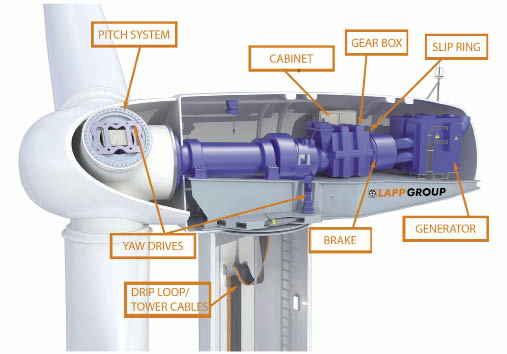

In [35]:
from IPython.display import Image
Image(filename='G2-Image3_opt.jpeg')